In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_excel('./file/health_screenings_2020_1000ea.xlsx')
data

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
0,2020,36,1,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,1,0,0,NaN,NaN,2021-12-29
1,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,1,0,0,NaN,NaN,2021-12-29
2,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,1,0,0,NaN,NaN,2021-12-29
3,2020,31,1,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,1,0,1,0.0,0.0,2021-12-29
4,2020,41,2,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,1,0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,48,1,12,165,70,92.0,0.5,0.9,1,...,0.8,21.0,30.0,39.0,3,1,0,NaN,NaN,2021-12-29
996,2020,41,1,12,165,70,88.0,1.2,1.0,1,...,0.7,29.0,37.0,21.0,2,0,1,0.0,0.0,2021-12-29
997,2020,48,2,14,155,55,80.2,0.5,0.6,1,...,0.9,36.0,35.0,34.0,1,1,1,1.0,1.0,2021-12-29
998,2020,41,2,14,150,55,79.5,1.0,1.0,1,...,0.7,30.0,29.0,20.0,1,0,0,NaN,NaN,2021-12-29


In [27]:
data6 = data.loc[:,['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']] 

data6.loc[data6['gender']==1,['gender']]='Male' 
data6.loc[data6['gender']==2,['gender']]='Female'
data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
data6.loc[data6['drinking']==1,['drinking']]='Drinking'
data6.loc[(data6['smoking']==1) | (data6['smoking']==2),['smoking']]='Non-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'
data6.head()

C:\Users\jangy\AppData\Local\Temp\ipykernel_12316\3335915804.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['gender']==1,['gender']]='Male'
C:\Users\jangy\AppData\Local\Temp\ipykernel_12316\3335915804.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-drinking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['drinking']==0,['drinking']]='Non-drinking'
C:\Users\jangy\AppData\Local\Temp\ipykernel_12316\3335915804.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-smoking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data

,gender,height,weight,waist,drinking,smoking
0,Male,165,60,72.1,Non-drinking,Non-smoking
1,Female,150,65,81.0,Non-drinking,Non-smoking
2,Female,155,55,70.0,Non-drinking,Non-smoking
3,Male,160,70,90.8,Non-drinking,Non-smoking
4,Female,155,50,75.2,Non-drinking,Non-smoking


In [28]:
# 음주 여부 및 흡연 상태 데이터 전처리
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()

drinking = drinking.to_frame(name = 'count')
smoking = smoking.to_frame(name = 'count')

drinking = drinking.reset_index()
smoking = smoking.reset_index()

[smoking, drinking]

[   gender      smoking  count
 0  Female  Non-smoking    500
 1  Female      Smoking     18
 2    Male  Non-smoking    321
 3    Male      Smoking    161,
    gender      drinking  count
 0  Female      Drinking    213
 1  Female  Non-drinking    305
 2    Male      Drinking    356
 3    Male  Non-drinking    126]

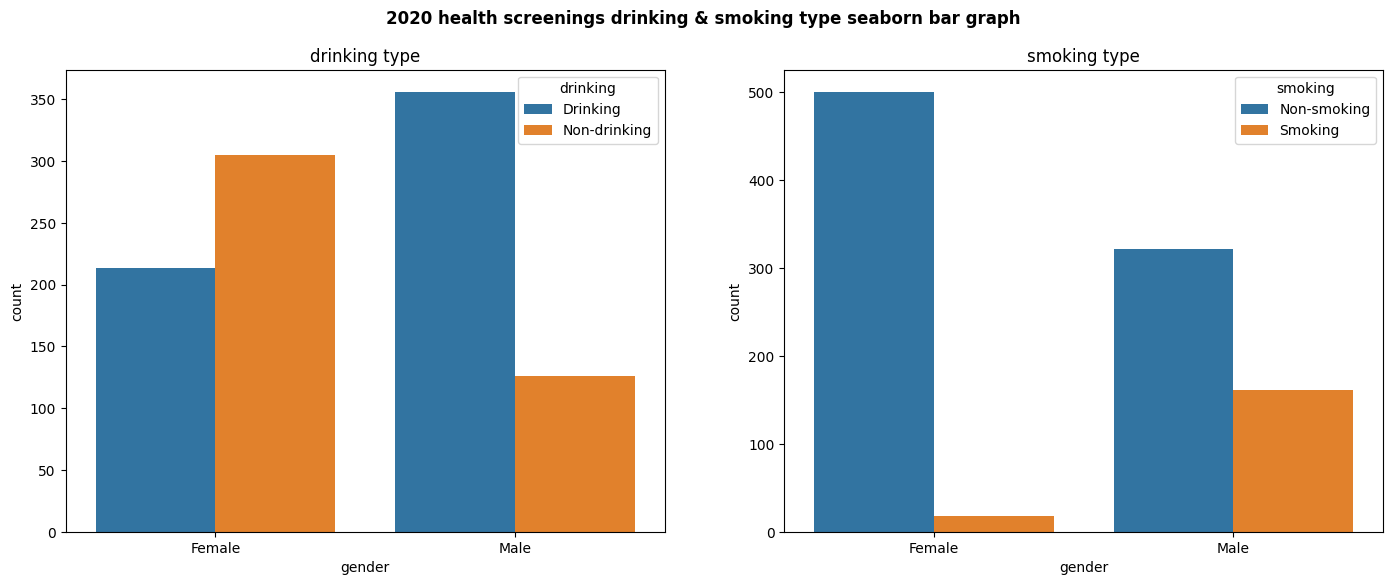

In [29]:
# 성별 음주 여부 및 흡연 상태 시본 막대 그래프

fig = plt.figure(figsize=(17, 6))

area1 = fig.add_subplot(1, 2, 1)
area2 = fig.add_subplot(1, 2, 2)

ax1 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=area1)
ax2 = sns.barplot(data=smoking, x='gender', y='count', hue='smoking', ax=area2)

fig.suptitle('2020 health screenings drinking & smoking type seaborn bar graph', fontweight = 'bold')
area1.set_title('drinking type')
area2.set_title('smoking type')

plt.show()

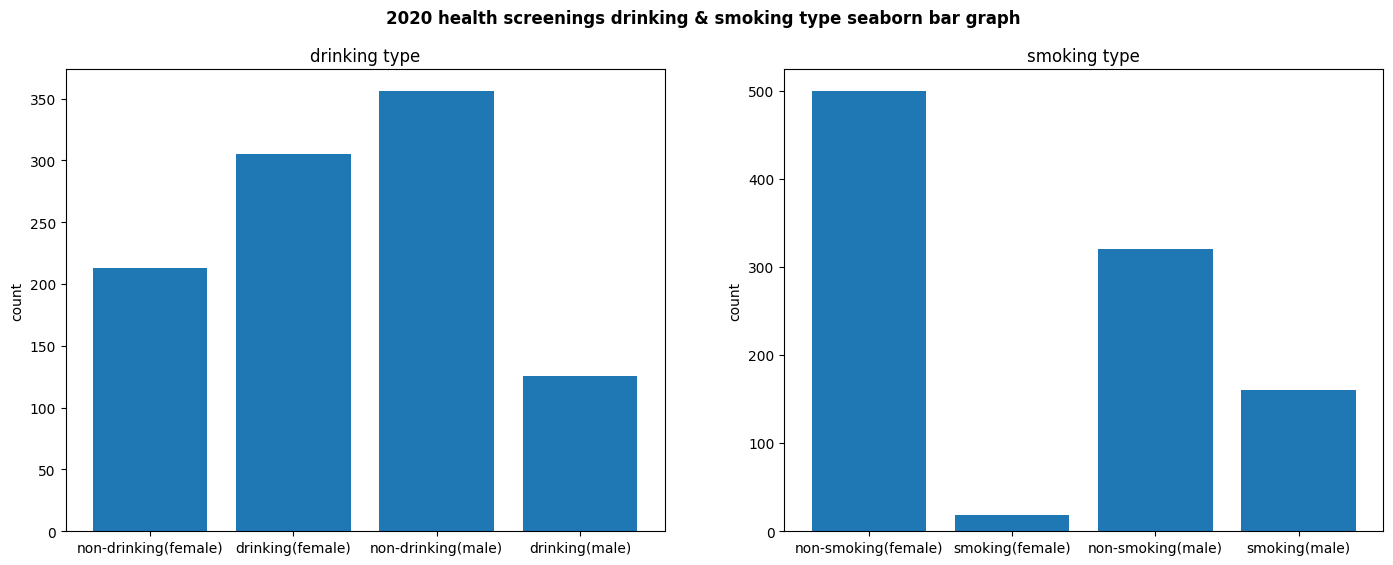

In [30]:
# 성별 음주 여부 및 흡연 상태 막대 그래프

fig = plt.figure(figsize=(17, 6))
fig.suptitle('2020 health screenings drinking & smoking type seaborn bar graph', fontweight = 'bold')
index = np.arange(4)

fig.add_subplot(1, 2, 1)

plt.bar(index, drinking['count'])
plt.title('drinking type')
plt.ylabel('count')
plt.xticks(index, ['non-drinking(female)', 'drinking(female)', 'non-drinking(male)', 'drinking(male)'])

fig.add_subplot(1, 2, 2)
plt.bar(index, smoking['count'])
plt.title('smoking type')
plt.ylabel('count')
plt.xticks(index, ['non-smoking(female)', 'smoking(female)', 'non-smoking(male)', 'smoking(male)'])

plt.show()

In [31]:
male_data = data6.loc[data6.gender=='Male',['gender','weight','waist','drinking','smoking']]
# Male인 행과 gender, weight, waist, drinking, smoking 열을 선택
female_data = data6.loc[data6.gender=='Female',['gender','weight','waist','drinking','smoking']]
male_data.head()

,gender,weight,waist,drinking,smoking
0,Male,60,72.1,Non-drinking,Non-smoking
3,Male,70,90.8,Non-drinking,Non-smoking
5,Male,85,94.0,Drinking,Smoking
6,Male,80,93.0,Drinking,Smoking
7,Male,65,92.0,Non-drinking,Smoking


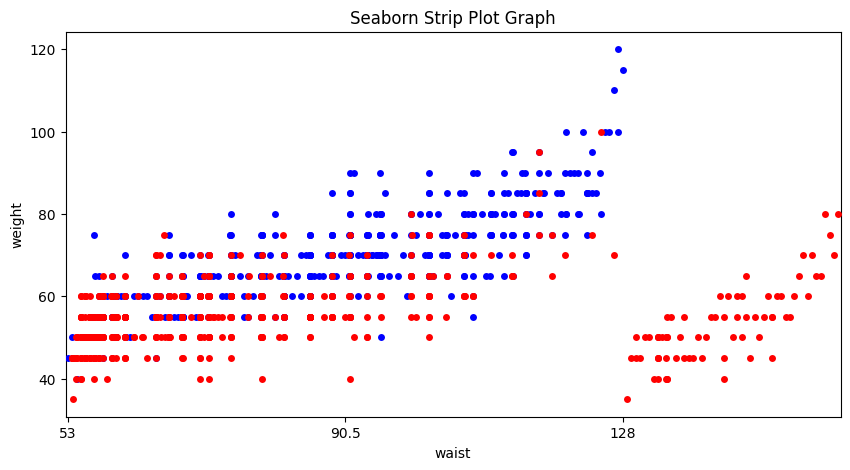

In [32]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Strip Plot Graph')

sns.stripplot(data=male_data, x='waist', y='weight', color='b') # 산점도 그래프 그리기
sns.stripplot(data=female_data, x='waist', y='weight', color='r')

plt.xticks(np.arange(0,127,63), labels=[53, 90.5, 128]) # x축 눈금 설정

plt.show()

In [34]:
# 점 중복 X
# 많은 데이터 처리시에는 선호 X
male_data_100 = male_data.head(100)
female_data_100 = female_data.head(100)

c:\Users\jangy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jangy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jangy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jangy\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

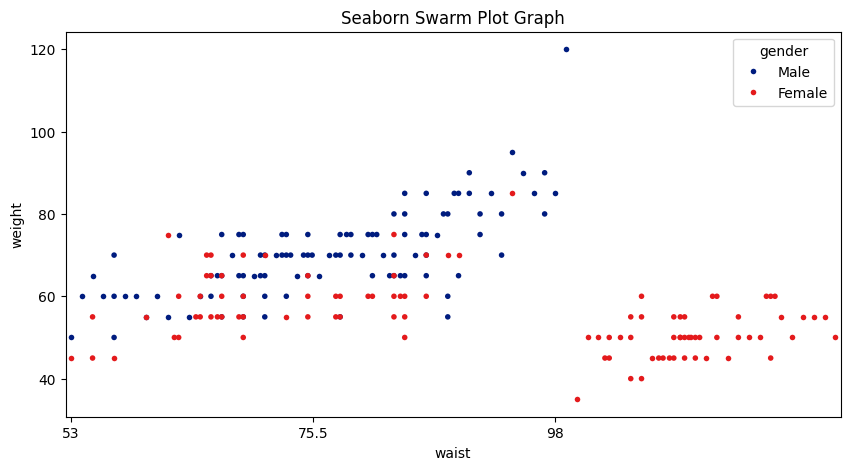

In [35]:
plt.figure(figsize=(10,5))
plt.title('Seaborn Swarm Plot Graph')

sns.swarmplot(data=male_data_100,x='waist',y='weight',hue='gender',palette='dark',size=4) 
sns.swarmplot(data=female_data_100,x='waist',y='weight',hue='gender',palette='Set1',size=4)

plt.xticks(np.arange(0,46,22.5), labels=[53, 75.5, 98])
plt.show()

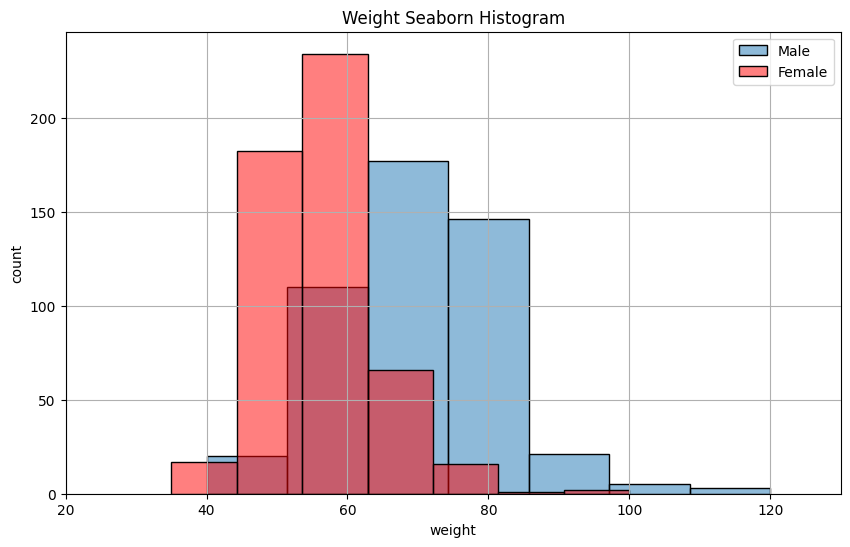

In [36]:
# 남성과 여성의 몸무게 히스토그램 그래프
plt.figure(figsize=(10,6))

sns.histplot(male_data['weight'], bins=7, alpha=0.5, label='Male')
sns.histplot(female_data['weight'], bins=7, alpha=0.5, label='Female', color='r')

plt.xlim(20,130) # x축 범위 설정
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend() # 범례 표시
plt.grid()
plt.show()

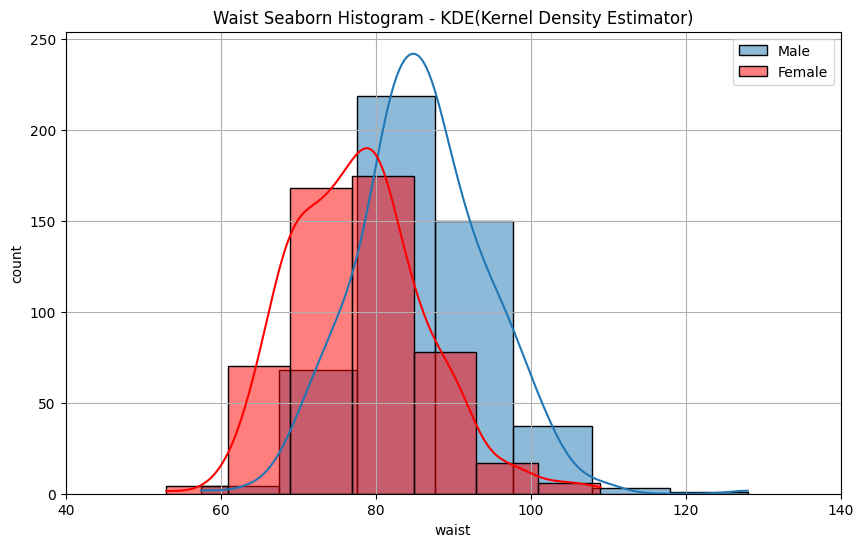

In [37]:
# 남성과 여성의 허리둘레 히스토그램 -> 커널 밀도 추정(KDE) 속성 지정
plt.figure(figsize=(10,6))
sns.histplot(male_data['waist'], bins=7, alpha=0.5, label='Male', kde=True)
# KDE : 히스토그램을 부드럽게 표현
sns.histplot(female_data['waist'], bins=7, alpha=0.5, label='Female', color='r', kde=True)

plt.xlim(40,140)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()

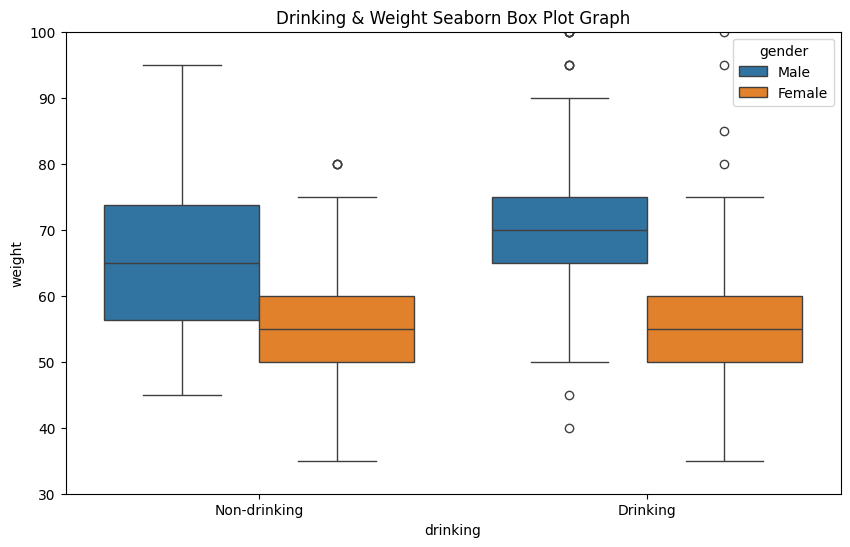

In [38]:
plt.figure(figsize=(10,6))
plt.title('Drinking & Weight Seaborn Box Plot Graph')

sns.boxplot(data=data6, x='drinking', y='weight', hue='gender')

plt.ylim(30,100)
plt.show()

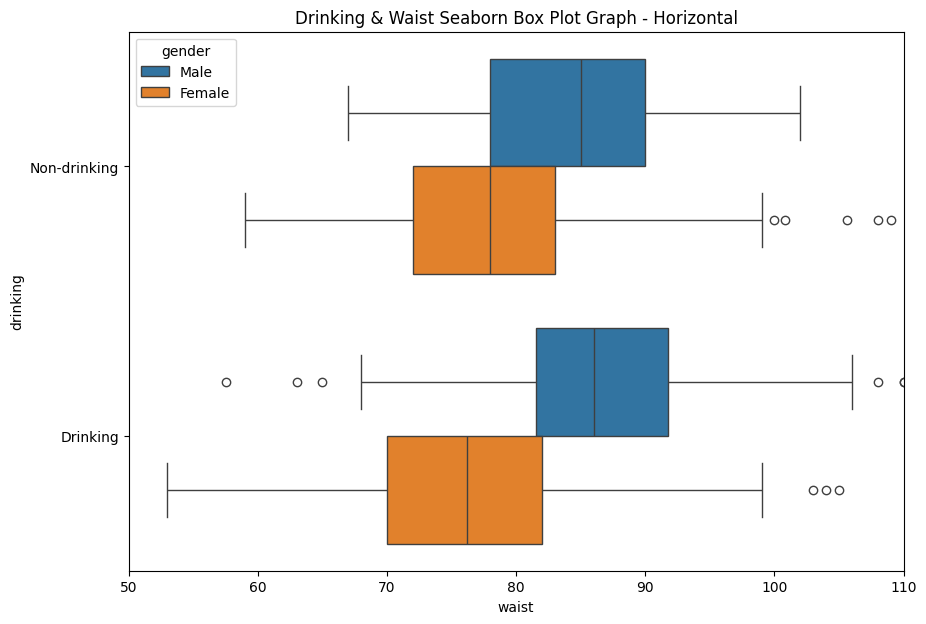

In [39]:
plt.figure(figsize=(10,7))
plt.title('Drinking & Waist Seaborn Box Plot Graph - Horizontal')

sns.boxplot(data=data6, x='waist', y='drinking', hue='gender', orient='h')

plt.xlim(50,110)
plt.show()

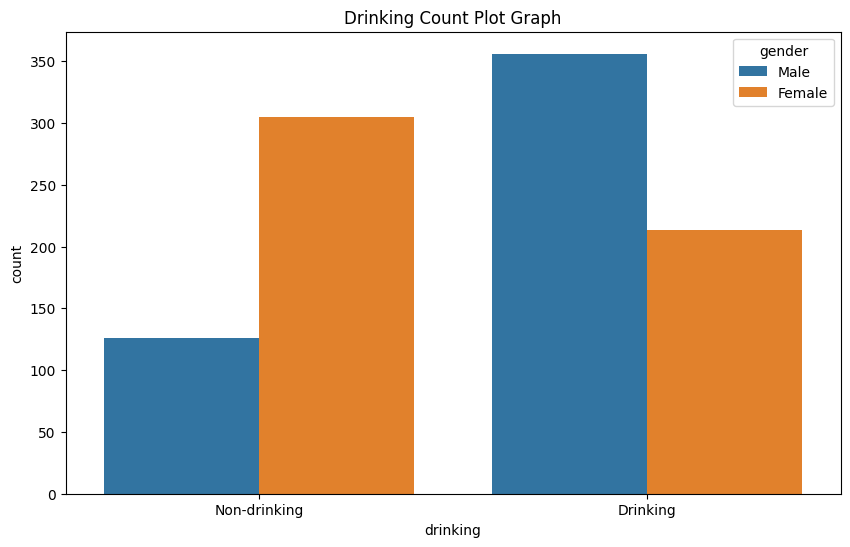

In [40]:
plt.figure(figsize=(10,6))
plt.title('Drinking Count Plot Graph')
sns.countplot(data=data6, x='drinking', hue='gender')

plt.show()